# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: 
1. Johnny Gomes
2. Nomeriano Neto
3. Reinaldo Ribeiro

In [2]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Entendimento dos dados a partir de graficos e outros indicadores 

In [160]:
# lê info regionais - divididos por estados, inclusive

df = pd.read_csv("./data/covid_regioes_26-ago.csv")
# df.sample(5)


In [161]:
# reordena registros (rows) do dataframe para que estados aparecam em ordem alfabetica:

df.sort_values(by=['estado', 'semanaEpi'], inplace=True, ignore_index=True)

df.head()


,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Norte,AC,12,25/02/2020,9,0,0,0,0
1,Norte,AC,12,26/02/2020,9,0,0,0,0
2,Norte,AC,12,27/02/2020,9,0,0,0,0
3,Norte,AC,12,28/02/2020,9,0,0,0,0
4,Norte,AC,12,29/02/2020,9,0,0,0,0


In [162]:
# type(df)
# df.shape
# df.info()

### Criacao de alguns graficos e indicadores a fim de conhecer melhor os dados da base:

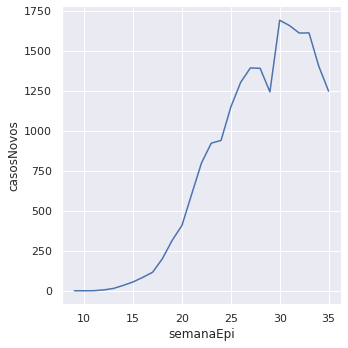

In [163]:
# grafico do crescimento de novos casos de coronavirus ao longo das semanas epidemiologicas:

sns.relplot(x='semanaEpi',y='casosNovos',
            data=df, kind='line', ci=None
)

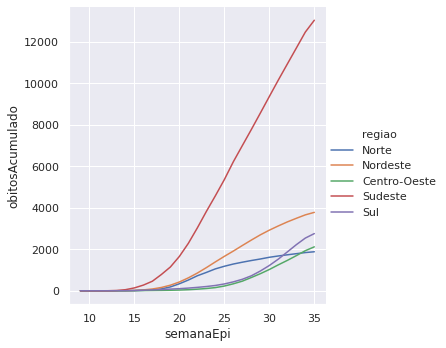

In [164]:
# grafico do crescimento de novos casos de coronavirus ao longo das semanas epidemiologicas:
# por regiao

sns.relplot(x='semanaEpi',y='obitosAcumulado',
            data=df, kind='line', hue='regiao', ci=None
)

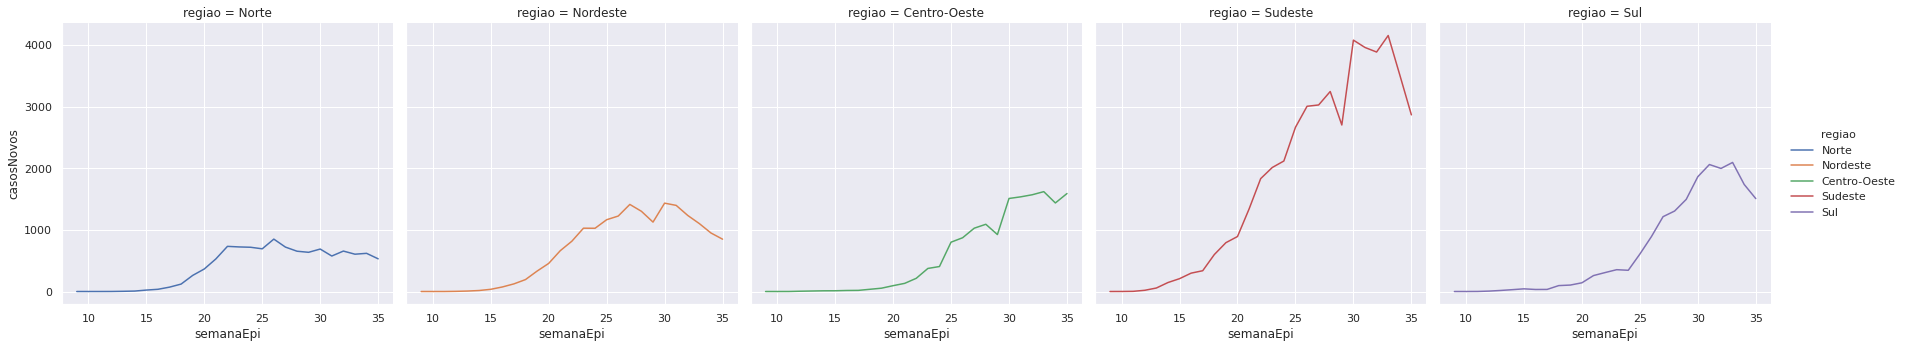

In [165]:
sns.relplot(x='semanaEpi',y='casosNovos',
            data=df, kind='line', hue='regiao',
            col='regiao', ci=None
) # talvez seja interessante usar: col_wrap=3

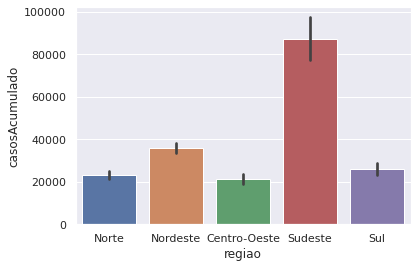

In [166]:
# sns.distplot(df.casosAcumulado)# hist=False só mostra o 'kernel density', kde=False so mostra o histograma

sns.barplot(x=df.regiao, y=df.casosAcumulado, palette="deep")

In [17]:
# # limpa quaisquer configurações setadas previamente para o Seaborn:
# sns.set()

# coronavirus = df.pivot("estado", "semanaEpi", "obitosAcumulado")

# # Draw a heatmap with the numeric values in each cell
# #f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(coronavirus, annot=True, fmt="d", linewidths=.5)

### Criacao do grafo (rede) a partir dos dados:

### Testes através da leitura de arquivos externos:

In [167]:

G = nx.nx.Graph()
G = nx.read_edgelist("./data/estados-brasil.txt")

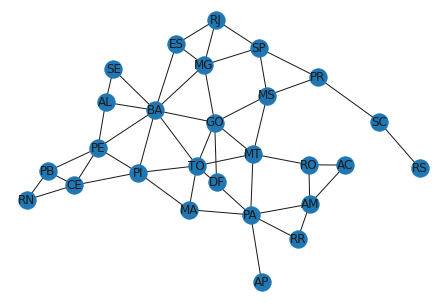

In [168]:

nx.draw(G, with_labels=True)

### A seguir, alguns indicadores que podem ser obtidos a partir da chamada de métodos simples, já disponibilizados pela biblioteca NetworkX:
+ Componentes Conexas;
+ Caminho Mínimo;
+ Vizinhos e Graus dos Vértices;
+ Betweenness centrality
+ Closeness centrality
+ Eigenvector centrality

#### Vizinhos e Graus dos Vértices:

In [35]:
grau_TO = G.degree('TO')
vizinhos_TO = G.neighbors('TO')

In [36]:
print(grau_TO)
print(list(vizinhos_TO))

6
['PA', 'GO', 'MT', 'MA', 'PI', 'BA']


In [37]:
# mostrando graus de todos os nós de forma interativa:
for no in G:
    print(no, G.degree(no))

RS 1
SC 2
PR 3
SP 4
MG 5
RJ 3
ES 3
DF 1
GO 6
MT 5
MS 4
TO 6
PA 6
AP 1
RR 2
AM 4
AC 2
RO 3
BA 8
SE 2
AL 3
PE 5
PI 5
PB 3
CE 4
RN 2
MA 3


Vê-se que os estados com maior numero de compartilhamento de fronteiras são:
1. BA ----------------> 8
2. GO,PA,TO ------> 6
3. MG,MT,PE,PI --> 5

#### Betweenness centrality

In [38]:
bet_cen = nx.betweenness_centrality(G)

# Um vértice que ocorre em muitos caminhos mais
# curtos entre outros dois vértices tem maior betweenness

# bet_cen


#### Closeness centrality

In [39]:
# Proximidade
clo_cen = nx.closeness_centrality(G)

# mede a menor distância média entre um vértice  e os outros no grafo:
# clo_cen

#### Eigenvector centrality

In [40]:
# autovetor: 
eig_cen = nx.eigenvector_centrality(G)

# mede a importância de um vértice na rede considerando cada aresta como um voto
# eig_cen


### Fim dos testes através da leitura de arquivos externos;

In [169]:
# conjunto de variaveis auxiliares a serem utilizadas ao longo do código:

# cria lista -- em ordem alfabetica -- de nós-estados:
estados = df.estado.unique()
estados = list(estados)

# cria lista -- em ordem alfabetica -- de nós-regioes:
regioes = df.regiao.unique()
regioes = list(regioes)

# cria dicionario com key=estado, value=regiao:
dict_estados_regioes = {
'RS':'Sul',
'SC':'Sul',
'PR':'Sul',
'SP':'Sudeste',
'MG':'Sudeste',
'RJ':'Sudeste',
'ES':'Sudeste',
'DF':'Centro-Oeste',
'GO':'Centro-Oeste',
'MT':'Centro-Oeste',
'MS':'Centro-Oeste',
'TO':'Norte',
'PA':'Norte',
'AP':'Norte',
'RR':'Norte',
'AM':'Norte',
'AC':'Norte',
'RO':'Norte',
'BA':'Nordeste',
'SE':'Nordeste',
'AL':'Nordeste',
'PE':'Nordeste',
'PI':'Nordeste',
'PB':'Nordeste',
'CE':'Nordeste',
'RN':'Nordeste',
'MA':'Nordeste'}

In [170]:
# casos acumulados por estados e a soma geral desses:
tot_casos_est      = df.groupby('estado')['casosAcumulado'].max()
tot_casos_est_sum  = df.groupby('estado')['casosAcumulado'].max().sum()

# obitos acumulados por estados e a soma geral desses:
tot_obitos_est     = df.groupby('estado')['obitosAcumulado'].max()
tot_obitos_est_sum = df.groupby('estado')['obitosAcumulado'].max().sum()

# teste para casos por regiao x estados e a respectiva soma total:
tot_reg            = df.groupby(['regiao', 'estado'])['casosAcumulado'].max()
tot_reg_sum        = df.groupby(['regiao', 'estado'])['casosAcumulado'].max().sum()

In [171]:
# checa total de obitos:
tot_obitos_est_sum

117665

In [172]:
# necessario fazer essa conversao --- ver type(tot_casos_est)
casos_dict = dict(tot_casos_est)
obitos_dict = dict(tot_obitos_est)


In [173]:
# instancia nós-estado com parametros iguais a todos:

regiao = ''
for e in estados:
    G.add_node(e,
              regiao=dict_estados_regioes.get(e),
              total_casos = 0,
              total_obitos = 0,
              media_temperatura=0)

In [174]:
# atribui casos acumulados a cada no-estado:

for no in G.nodes(data=True):
    for caso_estado in casos_list:
        if (no[0]==caso_estado):
            no[1]['total_casos']  = casos_dict[caso_estado]
            no[1]['total_obitos'] = obitos_dict[caso_estado]
     

In [175]:
color_map = []
for no in G.nodes(data=True):
    if (no[1]['regiao'] == 'Sul'):
        color_map.append('purple')
    elif(no[1]['regiao'] == 'Sudeste'): 
        color_map.append('red')
    elif(no[1]['regiao'] == 'Centro-Oeste'): 
        color_map.append('yellow')
    elif(no[1]['regiao'] == 'Norte'): 
        color_map.append('green')
    else:
        color_map.append('blue')

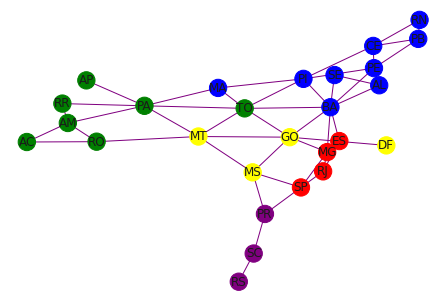

In [176]:
# desenha o grafo G:

nx.draw(G, node_color=color_map, edge_color='purple', with_labels=True)


In [177]:
for node in G.nodes(data=True):
    print(node)

('RS', {'regiao': 'Sul', 'total_casos': 115984, 'total_obitos': 3235, 'media_temperatura': 0})
('SC', {'regiao': 'Sul', 'total_casos': 137560, 'total_obitos': 2142, 'media_temperatura': 0})
('PR', {'regiao': 'Sul', 'total_casos': 122241, 'total_obitos': 3102, 'media_temperatura': 0})
('SP', {'regiao': 'Sudeste', 'total_casos': 776135, 'total_obitos': 29194, 'media_temperatura': 0})
('MG', {'regiao': 'Sudeste', 'total_casos': 201973, 'total_obitos': 4948, 'media_temperatura': 0})
('RJ', {'regiao': 'Sudeste', 'total_casos': 216675, 'total_obitos': 15700, 'media_temperatura': 0})
('ES', {'regiao': 'Sudeste', 'total_casos': 107909, 'total_obitos': 3086, 'media_temperatura': 0})
('DF', {'regiao': 'Centro-Oeste', 'total_casos': 155253, 'total_obitos': 2399, 'media_temperatura': 0})
('GO', {'regiao': 'Centro-Oeste', 'total_casos': 124593, 'total_obitos': 2888, 'media_temperatura': 0})
('MT', {'regiao': 'Centro-Oeste', 'total_casos': 85709, 'total_obitos': 2611, 'media_temperatura': 0})
('MS',

In [86]:
# informacoes sobre o grafo atual:

# nx.info(G)


In [178]:
obitos_dict

{'AC': 607,
 'AL': 1844,
 'AM': 3600,
 'AP': 647,
 'BA': 5116,
 'CE': 8351,
 'DF': 2399,
 'ES': 3086,
 'GO': 2888,
 'MA': 3390,
 'MG': 4948,
 'MS': 783,
 'MT': 2611,
 'PA': 6097,
 'PB': 2371,
 'PE': 7460,
 'PI': 1754,
 'PR': 3102,
 'RJ': 15700,
 'RN': 2215,
 'RO': 1100,
 'RR': 582,
 'RS': 3235,
 'SC': 2142,
 'SE': 1822,
 'SP': 29194,
 'TO': 621}

In [179]:
dict_estados_regioes

{'RS': 'Sul',
 'SC': 'Sul',
 'PR': 'Sul',
 'SP': 'Sudeste',
 'MG': 'Sudeste',
 'RJ': 'Sudeste',
 'ES': 'Sudeste',
 'DF': 'Centro-Oeste',
 'GO': 'Centro-Oeste',
 'MT': 'Centro-Oeste',
 'MS': 'Centro-Oeste',
 'TO': 'Norte',
 'PA': 'Norte',
 'AP': 'Norte',
 'RR': 'Norte',
 'AM': 'Norte',
 'AC': 'Norte',
 'RO': 'Norte',
 'BA': 'Nordeste',
 'SE': 'Nordeste',
 'AL': 'Nordeste',
 'PE': 'Nordeste',
 'PI': 'Nordeste',
 'PB': 'Nordeste',
 'CE': 'Nordeste',
 'RN': 'Nordeste',
 'MA': 'Nordeste'}

In [180]:
# soma casos dos estados e aribui a respectiva regiao:

obitos_regiao = {}
dict_estados_regioes
for r in regioes:
    soma_regiao = 0
    for key, values in dict_estados_regioes.items():
        if values == r:
            soma_regiao += obitos_dict[key]
            obitos_regiao.update({r: soma_regiao})
        
# suma de obitos por regiao:
print(obitos_regiao)


{'Norte': 13254, 'Nordeste': 34323, 'Centro-Oeste': 8681, 'Sudeste': 52928, 'Sul': 8479}


### Grafo interativo -- construído a partir do Bokeh

In [181]:
import sys
print(sys.version)
print(nx.__version__)

3.6.10 | packaged by conda-forge | (default, Apr 24 2020, 16:44:11) 
[GCC 7.3.0]
2.4


In [182]:
# usa bokeh para plotar o grafo:

from bokeh.io import output_file, show
# from bokeh.plotting import figure, from_networkx

from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,
                          TapTool,EdgesAndLinkedNodes,NodesAndLinkedEdges)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx


In [183]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "green", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["regiao"] == G.nodes[end_node]["regiao"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color


nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=600, plot_height=600,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Covid-19 por estados, Brasil"

node_hover_tool = HoverTool(tooltips=[("", "@index"), ("Obitos", "@total_obitos")])
plot.add_tools(node_hover_tool, TapTool(), BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=30, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)

plot.renderers.append(graph_renderer)

output_file("covid19.html")
show(plot)

### Teste grafo interativo número 2:

### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: